Лабораторная работа №1 по курсу "Методы машинного обучения"

Карягин А.Д. группа ИУ5-22М

Задание

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:

История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида
графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget  https://raw.githubusercontent.com/azar-s91/dataset/master/BankChurners.csv

--2022-06-08 11:04:25--  https://raw.githubusercontent.com/azar-s91/dataset/master/BankChurners.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1210878 (1.2M) [text/plain]
Saving to: ‘BankChurners.csv’

BankChurners.csv    100%[===================>]   1.15M  --.-KB/s    in 0.01s   

2022-06-08 11:04:25 (119 MB/s) - ‘BankChurners.csv’ saved [1210878/1210878]



In [3]:
data = pd.read_csv('BankChurners.csv', sep=",")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Распределение клиентов банка по возрасту

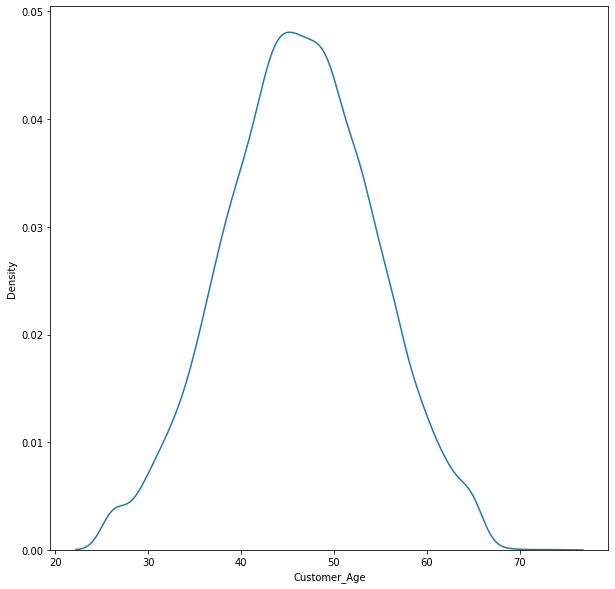

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data=data, x="Customer_Age")

Число карт различного вида:

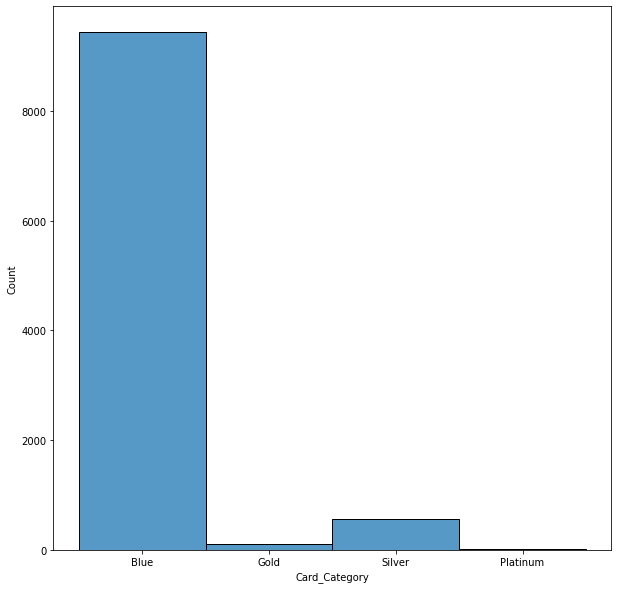

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data['Card_Category'], discrete=True)

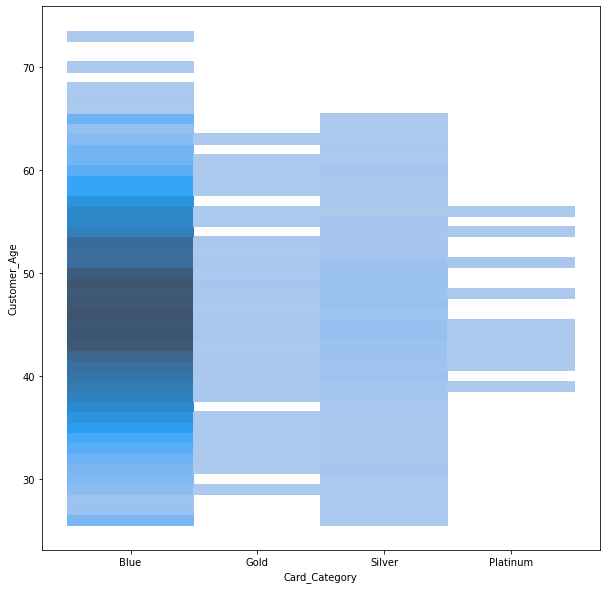

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data, x="Card_Category", y="Customer_Age", discrete=True)

Зависимость средней используемости карты от некоторых категориальных признаков. Для этого применим график вида скрипка.

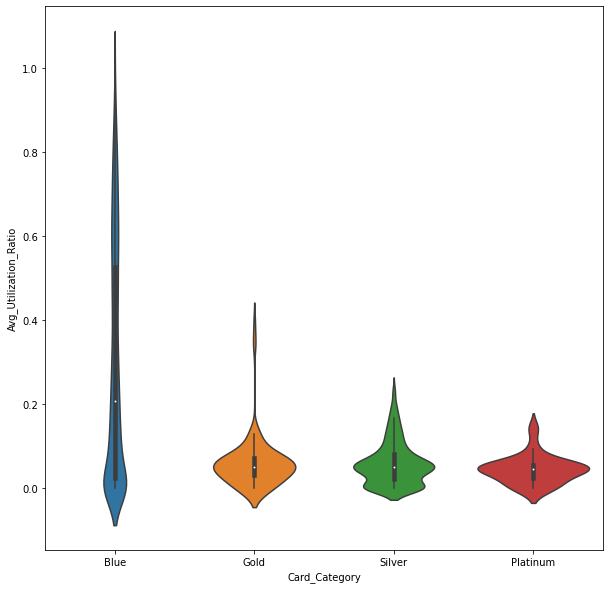

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='Card_Category', y='Avg_Utilization_Ratio', data=data)

Из данного графика можно сделать вывод о том, что наибольшая активность присутствует у карт низкого уровня.

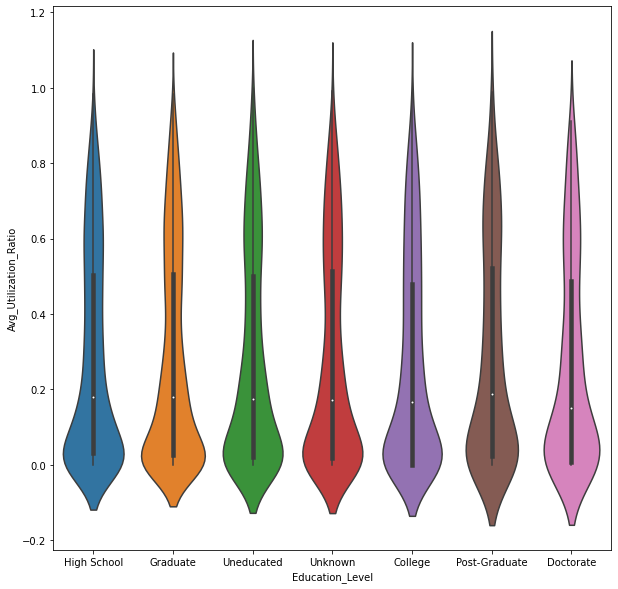

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='Education_Level', y='Avg_Utilization_Ratio', data=data)

Из данного графика видно, что зависимости между уровнем образования и активностью использования карты нет.

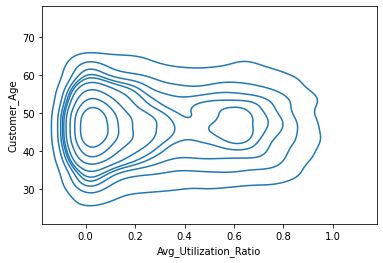

In [9]:
sns.kdeplot(data=data, x="Avg_Utilization_Ratio", y="Customer_Age")

Text(0.5, 0.98, 'Корреляционные матрицы, построенные различными методами')

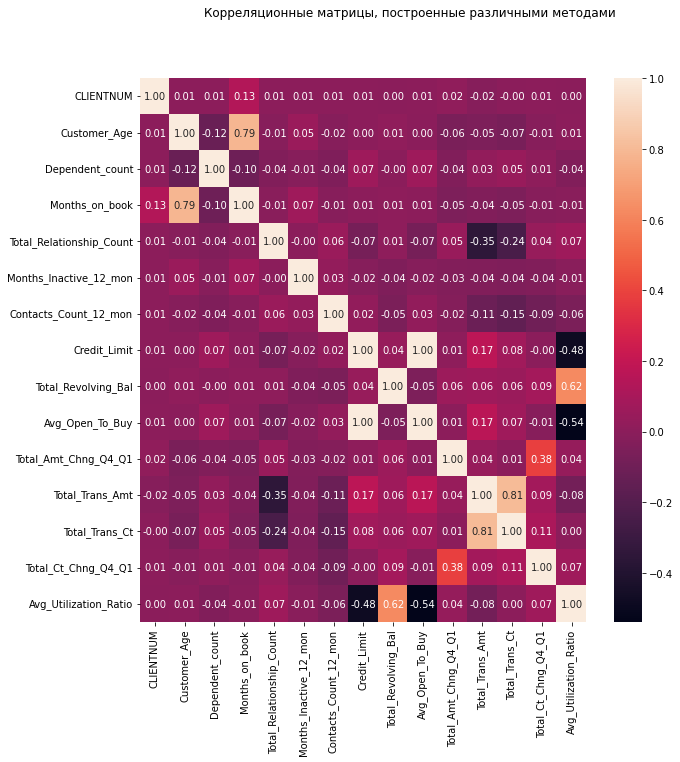

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')

Зависимости имеющие наибольший коэффициент корреляции:

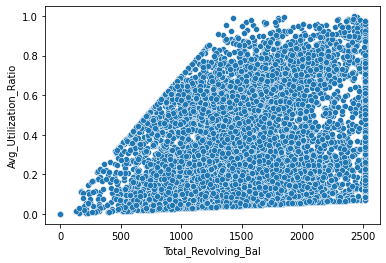

In [11]:
sns.scatterplot(x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', data=data)

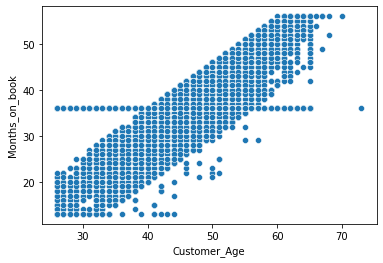

In [12]:
sns.scatterplot(x='Customer_Age', y='Months_on_book', data=data)